In [76]:
import tensorflow as tf
import tensorflow_datasets as tfds
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_ds, test_ds = tfds.load('cifar10', split=['train', 'test'], as_supervised=True)

In [33]:
train_data = []
train_labels = []

for example, label in train_ds:
  train_data.append(example.numpy())
  train_labels.append(label.numpy())

test_data = []
test_labels = []

for example, label in test_ds:
  test_data.append(example.numpy())
  test_labels.append(label.numpy())


train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [34]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


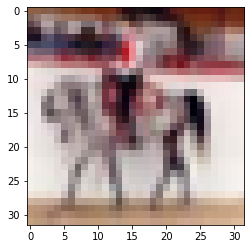

In [41]:
plt.imshow(train_data[0])

In [37]:
print(train_data.max())

255


In [38]:
train_data = train_data / 255
test_data = test_data / 255

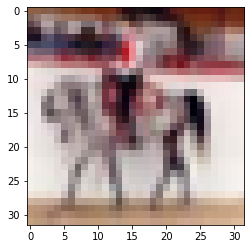

In [42]:
plt.imshow(train_data[0])

In [43]:
train_data.max()

1.0

In [48]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 119s 75ms/step - loss: 1.6482 - accuracy: 0.3838
Epoch 2/10
1563/1563 [==============================] - 116s 75ms/step - loss: 1.2190 - accuracy: 0.5633
Epoch 3/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0565 - accuracy: 0.6275
Epoch 4/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9565 - accuracy: 0.6645
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.8690 - accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7962 - accuracy: 0.7216
Epoch 7/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.7433 - accuracy: 0.7392
Epoch 8/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.6872 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.6446 - accuracy: 0.7731
Epoch 10/10
1563/1563 [==============================] 

In [87]:
def predict(model, data, labels):

  i = random.randint(0, 10000)


  prediction = model.predict(tf.reshape(data[i], (1, 32, 32 ,3)))

  print('Prediction: ', prediction.argmax())
  print('Label: ', labels[i])

  if prediction.argmax() - labels[i] == 0:
    print('Correct')
    print()
  else:
    print('Incorrect')
    print()

In [88]:
for i in range(25):
  predict(model=model, data=test_data, labels=test_labels)

Prediction:  3
Label:  3
Correct

Prediction:  7
Label:  7
Correct

Prediction:  5
Label:  5
Correct

Prediction:  2
Label:  2
Correct

Prediction:  5
Label:  5
Correct

Prediction:  9
Label:  9
Correct

Prediction:  2
Label:  2
Correct

Prediction:  1
Label:  1
Correct

Prediction:  5
Label:  5
Correct

Prediction:  6
Label:  6
Correct

Prediction:  9
Label:  9
Correct

Prediction:  3
Label:  6
Incorrect

Prediction:  9
Label:  9
Correct

Prediction:  9
Label:  1
Incorrect

Prediction:  1
Label:  9
Incorrect

Prediction:  6
Label:  2
Incorrect

Prediction:  5
Label:  4
Incorrect

Prediction:  7
Label:  7
Correct

Prediction:  4
Label:  4
Correct

Prediction:  8
Label:  8
Correct

Prediction:  8
Label:  8
Correct

Prediction:  9
Label:  9
Correct

Prediction:  2
Label:  2
Correct

Prediction:  8
Label:  8
Correct

Prediction:  9
Label:  1
Incorrect

